Теперь давайте рассмотрим пример создания многослойной ИНС средствами pytorch с Ирисами Фишера

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
from torch import nn
import torch.nn.functional as F

In [2]:
iris = load_iris()
X = iris.data
target = iris.target
labels = iris.target_names

In [3]:
df = pd.DataFrame(X, columns = iris.feature_names)
df['target'] = target
df['species_category'] = df['target'].map(
    {0:'setosa', 1:'versicolor', 2:'virginica'}
)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species_category
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


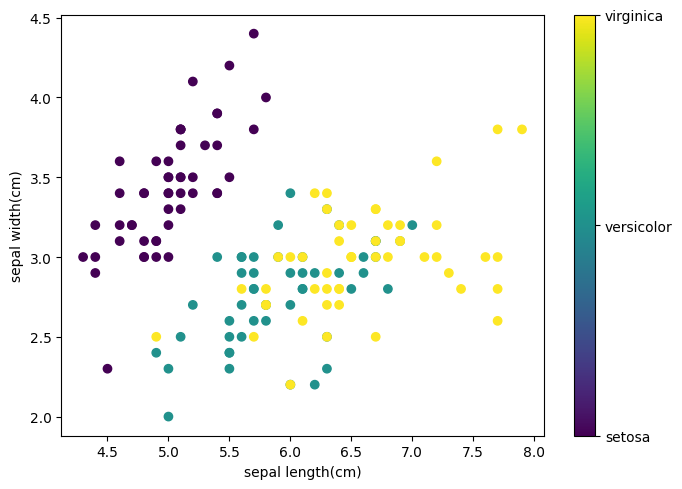

In [4]:
plt.figure(figsize=(7, 5))
plt.scatter(df['sepal length (cm)'].values,
            df['sepal width (cm)'].values,
            c=df['target'].values)
plt.colorbar(ticks=[0, 1, 2],
             format=plt.FuncFormatter(lambda i, *args: labels[i]))
plt.xlabel('sepal length(cm)')
plt.ylabel('sepal width(cm)')
plt.tight_layout()
plt.show()

In [5]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=42)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

В популярном научно-фантастическом романе Дугласа Адамса "Автостопом по Галактике" 1979 года ближе к концу книги суперкомпьютер Deep Thought показывает, что ответ на великий вопрос о “жизни, вселенной и всем остальном” равен 42.

In [8]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [9]:
model = nn.Sequential(
    nn.Linear(4, 32),  # Входной слой: 4 фичи -> 32 нейрона
    nn.ReLU(),         # Функция активации
    nn.Linear(32, 16), # Скрытый слой: 32 нейрона -> 16 нейронов
    nn.ReLU(),         # Функция активации
    nn.Linear(16, 3)   # Выходной слой: 16 нейронов -> 3 класса
)

Также можно использовать стандартный модель pytorch
https://pytorch.org/docs/stable/generated/torch.nn.Module.html


In [10]:
# class NeuralNet(nn.Module):

#     def __init__(self, in_features=4, out_features=3):
#         super().__init__()
#         self.fc1 = nn.Linear(in_features=in_features,
#                              out_features=120)
#         self.fc2 = nn.Linear(in_features=120,
#                              out_features=84)
#         self.fc3 = nn.Linear(in_features=84,
#                              out_features=16)
#         self.fc4 = nn.Linear(in_features=16,
#                              out_features=out_features)

#     def forward(self, X):
#         X = F.relu(self.fc1(X))
#         X = F.relu(self.fc2(X))
#         X = F.relu(self.fc3(X))
#         return self.fc4(X)

# model = NeuralNet()

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [12]:
epochs = 100
losses = []
for i in range(epochs):
    i += 1

    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    losses.append(loss.detach().numpy())

    if i % 10 == 0:
        print(f'epoch: {i} -> loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 10 -> loss: 0.5751939415931702
epoch: 20 -> loss: 0.24500752985477448
epoch: 30 -> loss: 0.12228211015462875
epoch: 40 -> loss: 0.0748014971613884
epoch: 50 -> loss: 0.059602443128824234
epoch: 60 -> loss: 0.054152630269527435
epoch: 70 -> loss: 0.05179032310843468
epoch: 80 -> loss: 0.05016345530748367
epoch: 90 -> loss: 0.049150340259075165
epoch: 100 -> loss: 0.048196226358413696


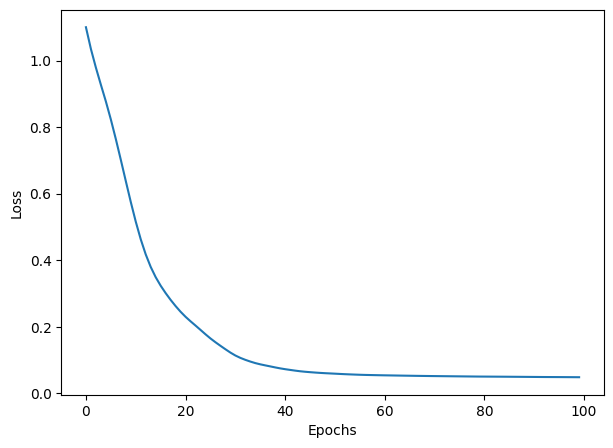

In [13]:
plt.figure(figsize=(7, 5))
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [14]:
with torch.no_grad():

    y_pred = model(X_test)
    preds = torch.max(y_pred, dim=1)[1]
    correct = (preds == y_test).sum()

print(f'{correct} out of {y_test.shape[0]} is correct : {correct.item() / y_test.shape[0] * 100}%')

45 out of 45 is correct : 100.0%


In [15]:
def predict_unknown(X_unknown):

    y_pred = model(X_unknown)
    return labels[y_pred.argmax()]

In [16]:
unknown_iris = torch.tensor([5.6, 3.7, 2.2, 0.5])

In [17]:
predict_unknown(unknown_iris)

np.str_('virginica')